<a href="https://colab.research.google.com/github/aditisingh2912/Intro-to-CV/blob/main/opencv3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 To enhance the given image using point, spatial, transform operation

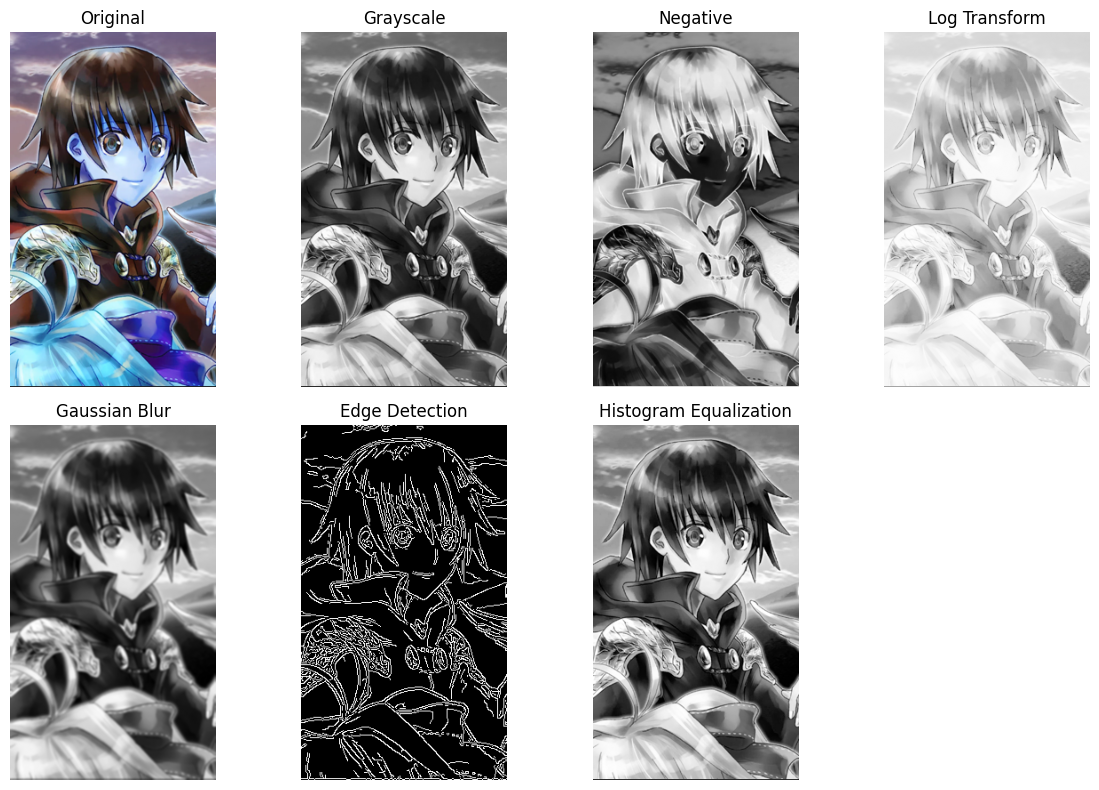

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


image_path = "/content/drive/MyDrive/sato.png"
image = cv2.imread(image_path)

gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

negative = 255 - gray


log_transformed = (np.log(1 + gray.astype(np.float32))) * (255 / np.log(256))
log_transformed = np.uint8(log_transformed)

gaussian_blur = cv2.GaussianBlur(gray, (5, 5), 0)

edges = cv2.Canny(gray, 100, 200)


hist_equalized = cv2.equalizeHist(gray)

# Display images
titles = ["Original", "Grayscale", "Negative", "Log Transform", "Gaussian Blur", "Edge Detection", "Histogram Equalization"]
images = [image, gray, negative, log_transformed, gaussian_blur, edges, hist_equalized]

plt.figure(figsize=(12, 8))
for i in range(7):
    plt.subplot(2, 4, i+1)
    plt.imshow(images[i], cmap="gray")
    plt.title(titles[i])
    plt.axis("off")

plt.tight_layout()
plt.show()


 To enhance the given image using gray level slicing, sharpening, histogram equilization,
homomorphic filtering

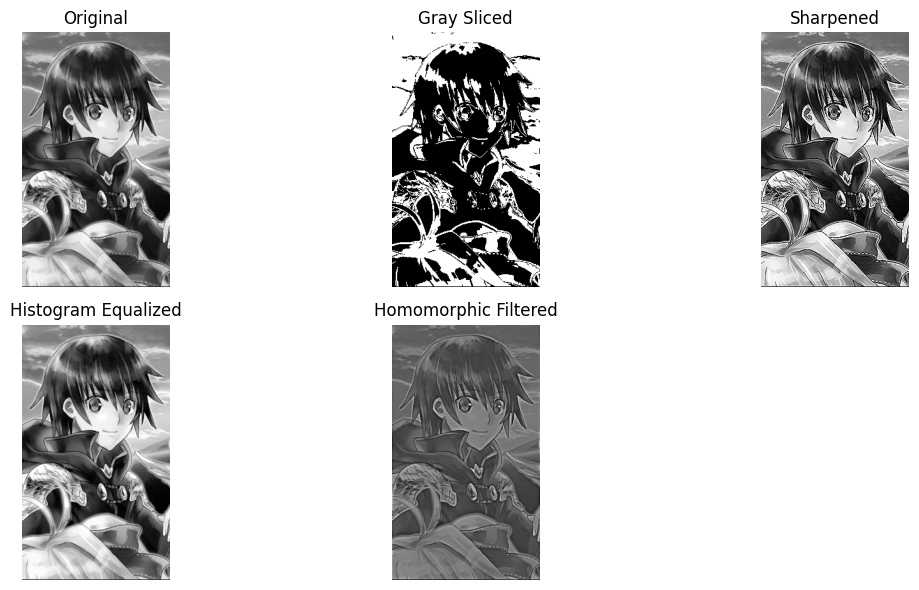

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


image_path = "/content/drive/MyDrive/sato.png"
image = cv2.imread(image_path)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# 1. Gray Level Slicing
def gray_level_slicing(img, min_range=100, max_range=200):
    mask = (img >= min_range) & (img <= max_range)
    sliced_img = np.zeros_like(img)
    sliced_img[mask] = 255
    return sliced_img

gray_sliced = gray_level_slicing(gray)

laplacian_kernel = np.array([[0, -1, 0],
                             [-1, 5, -1],
                             [0, -1, 0]])
sharpened = cv2.filter2D(gray, -1, laplacian_kernel)


hist_eq = cv2.equalizeHist(gray)

#
def homomorphic_filter(img, d0=30, gamma_h=1.5, gamma_l=0.5):
    img = np.float32(img) / 255.0  # Normalize image

    # Apply log transform
    img_log = np.log1p(img)

    # Fourier Transform
    dft = np.fft.fft2(img_log)
    dft_shift = np.fft.fftshift(dft)

    # Create Gaussian high-pass filter
    rows, cols = img.shape
    crow, ccol = rows // 2, cols // 2
    d0 = d0 ** 2
    hpf = np.ones((rows, cols))

    for u in range(rows):
        for v in range(cols):
            d = (u - crow) ** 2 + (v - ccol) ** 2
            hpf[u, v] = (gamma_h - gamma_l) * (1 - np.exp(-d / d0)) + gamma_l


    dft_shift_filtered = dft_shift * hpf
    dft_filtered = np.fft.ifftshift(dft_shift_filtered)
    img_filtered = np.fft.ifft2(dft_filtered)
    img_filtered = np.exp(np.real(img_filtered)) - 1

    img_filtered = cv2.normalize(img_filtered, None, 0, 255, cv2.NORM_MINMAX)
    return np.uint8(img_filtered)

homomorphic_filtered = homomorphic_filter(gray)

titles = ["Original", "Gray Sliced", "Sharpened", "Histogram Equalized", "Homomorphic Filtered"]
images = [gray, gray_sliced, sharpened, hist_eq, homomorphic_filtered]

plt.figure(figsize=(12, 6))
for i in range(5):
    plt.subplot(2, 3, i+1)
    plt.imshow(images[i], cmap="gray")
    plt.title(titles[i])
    plt.axis("off")

plt.tight_layout()
plt.show()
